In [3]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action='ignore') 

import gzip
import xml.etree.ElementTree as ET
import os, re, pickle
from pkg.trace_stack_regi import extractTrace
from pkg.trace_stack_regi import search_regi_files
from pkg.trace_stack_regi import segment_crop, regi_cropped_img, save_pickle, load_pickle
from collections import Counter

import sys
import numpy as np
from matplotlib import pyplot as plt
from skimage import transform, io, exposure

from pystackreg import StackReg
# import pystackreg

In [4]:
file_path_regi = search_regi_files(raw_path='./data', regi_path='./registration')
segment_crop(file_path_regi)
regi_cropped_img()

[INFO | 2022-03-08 16:50:56,534 | trace_stack_regi.py | dir_exist_check] (line 62) ./data already exist :: info logger
[INFO | 2022-03-08 16:50:56,558 | trace_stack_regi.py | dir_exist_check] (line 62) ./crop_data already exist :: info logger
[INFO | 2022-03-08 16:50:56,559 | trace_stack_regi.py | dir_exist_check] (line 62) ./registration already exist :: info logger
[INFO | 2022-03-08 16:50:56,559 | trace_stack_regi.py | search_regi_files] (line 160) Directory existence check complete :: info logger
[INFO | 2022-03-08 16:50:56,561 | trace_stack_regi.py | unique_counter] (line 103) start unique id count :: info logger
[INFO | 2022-03-08 16:50:56,579 | trace_stack_regi.py | dir_exist_check] (line 62) ./registration\#000001 already exist :: info logger


In [7]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import time
import numpy as np
def drawtextimage(word: str):
        print('aaaaaaa', word)
        #배경 이미지의 크기
        W, H = (200, 200) 
        #배경 이미지를 흰색으로 하여 생성
        image = Image.new('RGB', (W, H), (255, 255, 255)) 
        #해당 폰트와 사이즈 설정
        font = ImageFont.truetype('서울한강 장체B.ttf', size=200) 
        #이미지 생성
        draw = ImageDraw.Draw(image) 
        #글자의 크기
        w, h = draw.textsize(word, font=font) 
        #배경 이미지와 글자의 크기를 이용하여 배경 중간에 글자 배치
        draw.text(((W - w) / 2, (H - h) / 2), word, fill="black", font=font) 
        #이미지 저장
        # image.save(f"{title}{e}.jpg")
        return image, W, H
for idx, i in enumerate('벽력일섬'):
    cv2.namedWindow(str(idx))
    cv2.resizeWindow(str(idx), idx*100, idx*100)
    # img = cv2.imread("aaa.jpg")
    img, W, H = drawtextimage(i)
    cv2.moveWindow(str(idx), W, H)
    cv2.imshow(str(idx), np.array(img))
    cv2.waitKey(25)
    time.sleep(0.5)
#     cv2.destroyWindow(str(idx))



aaaaaaa 벽
aaaaaaa 력
aaaaaaa 일
aaaaaaa 섬


In [61]:
MRbead = cv2.imread('MR_bead.tif')
FLbead = cv2.imread('FL_bead.tif')

In [62]:
MRbead.shape, FLbead.shape

((357, 457, 3), (403, 402, 3))

In [65]:
MRresize = cv2.resize(MRbead[13:-13, 13:-13, :], dsize=(357, 457))
FLresize = cv2.resize(FLbead[13:-13, 13:-13, :], dsize=(357, 457))

In [66]:
FLresize.shape, MRresize.shape

((457, 357, 3), (457, 357, 3))

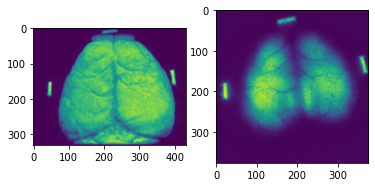

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(MRbead[13:-13, 13:-13, 0])
ax[1].imshow(FLbead[13:-13, 13:-13, 1])

In [67]:
from pystackreg import StackReg
from pystackreg.util import to_uint16
sr = StackReg(StackReg.AFFINE)
sr.register(FLresize[:, :, 1], MRresize[:, :, 0]) # register 2nd image to 1st image in x, y position
transformed = to_uint16(sr.transform(MRresize[:, :, 0])) # apply transform and clip negative value

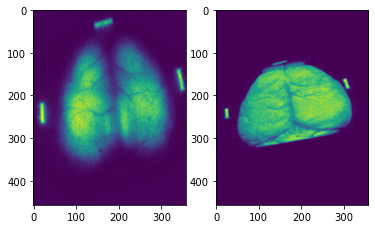

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(FLresize[:, :, 1])
ax[1].imshow(transformed)

In [4]:
import datetime
import cv2

capture = cv2.VideoCapture('text image/벽력일섬.mp4')
# capture.set(cv2.CAP_PROP_FRAME_WIDTH, 150)
# capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 150)
# fourcc = cv2.VideoWriter_fourcc(*'XVID')

i = 0
while True:
    ret, frame = capture.read()
    key = cv2.waitKey(10)
    if key==27:
        break
    now = datetime.datetime.now().strftime("%d_%H-%M-%S")
    cv2.imwrite(f'./text image/{now}.png', frame)

capture.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [15]:
os.path.isdir('./text image')

True

In [16]:
os.path.isfile('text image/08_17-38-24.png')

True

In [17]:
aaa = cv2.imread('./text image/08_17-43-58.png')

In [18]:
+ [(f'.\\text image\\{img}', 'text image') for img in os.listdir('./text image) if img.endswith('.png')],

(1080, 1920, 3)

In [ ]:
pathex=['.', '.\\pkg'],
binaries=[],
datas=[('.\\text image', '.\\text image'), ('seoulfont.ttf', 'seoulfont.ttf')],
hiddenimports=['importlib_resources.trees', 'pkg_resources.py2_warn', 'pkg_resources.markers'],

In [1]:
from PIL import ImageFont, ImageDraw, Image

for title in ["hiragana", "katakana"]:
    jpn = ['asdf']
    eng = ['a']

    for j, e in zip(jpn, eng):
        #배경 이미지의 크기

        W, H = (200, 200) 
        #배경 이미지를 흰색으로 하여 생성
        image = Image.new('RGB', (W, H), (255, 255, 255)) 
        #해당 폰트와 사이즈 설정
        font = ImageFont.truetype("arial.ttf", size=200) 
        #이미지 생성
        draw = ImageDraw.Draw(image) 
        #글자의 크기
        w, h = draw.textsize(e, font=font) 
        #배경 이미지와 글자의 크기를 이용하여 배경 중간에 글자 배치
        draw.text(((W - w) / 2, (H - h) / 2), e, fill="black", font=font) 
        #이미지 저장
        # image.save(f"{title}{e}.jpg")

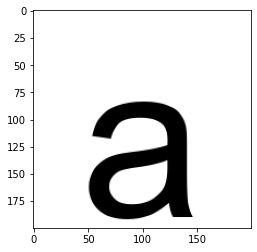

In [34]:
plt.imshow(image)

In [4]:
from tkinter import *

Window=Tk()
ListePhoto=list()
ListePhoto.append(PhotoImage(file='aaa.jpg'))

def Try():


    Window.title('image')
    Window.geometry('+0+0')
    Window.configure(bg='white')

    DisplayImage()

def DisplayImage():

    label_frame=LabelFrame(Window, relief='ridge', borderwidth=12, text="AnImage",
                         font='Arial 16 bold',bg='lightblue',fg='black')
    ListeBouttons=list()#Liste Vide pour les Radiobutton(s)

    RadioButton = Radiobutton(label_frame,text="notext",image=ListePhoto[0], indicatoron=0)
    RadioButton.grid(row=1,column=1)
    label_frame.pack(side="left")


TclError: couldn't recognize data in image file "aaa.jpg"

In [12]:
import tkinter as tk
from PIL import Image , ImageTk

In [ ]:
import tkinter as tk

def popupmsg(msg, title):
    root = tk.Tk()
    root.title(title)
    label = tk.Label(root, text=msg)
    label.pack(side="top", fill="x", pady=10)
    B1 = tk.Button(root, text="Okay", command = root.destroy)
    B1.pack()
    popup.mainloop()

In [1]:
import cv2
img = cv2.imread('aaa.jpg')
 
cv2.imshow('sample image',img)

In [18]:
import sys
from tkinter import * #or Tkinter if you're on Python2.7

def button1():
    novi = Toplevel()
    canvas = Canvas(novi, width = 300, height = 200)
    canvas.pack(expand = YES, fill = BOTH)
    gif1 = PhotoImage(file = 'aaa.jpg')
                                #image not visual
    canvas.create_image(50, 10, image = gif1, anchor = NW)
    #assigned the gif1 to the canvas object
    canvas.gif1 = gif1


mGui = Tk()
button1 = Button(mGui,text ='Sklop',command = button1, height=5, width=20).pack()

mGui.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\spruce\anaconda3\envs\regi\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\spruce\AppData\Local\Temp\ipykernel_26300\2746296939.py", line 8, in button1
    gif1 = PhotoImage(file = 'aaa.jpg')
  File "C:\Users\spruce\anaconda3\envs\regi\lib\tkinter\__init__.py", line 4064, in __init__
    Image.__init__(self, 'photo', name, cnf, master, **kw)
  File "C:\Users\spruce\anaconda3\envs\regi\lib\tkinter\__init__.py", line 4009, in __init__
    self.tk.call(('image', 'create', imgtype, name,) + options)
_tkinter.TclError: couldn't recognize data in image file "aaa.jpg"


In [4]:
import numpy as np
from numpy.random import uniform

In [10]:
good_luck =140
((good_luck >= 0) and (good_luck < 7)) or ((good_luck >= 9) and (good_luck < 300))

True

In [7]:
aa = np.floor(uniform(0, 100))